### Jensen-Shannon Divergence

In [3]:
import numpy as np
from scipy import stats
from scipy.stats import entropy

# Generate two random distributions
data1 = np.random.normal(0, 1, 1000)
data2 = np.random.normal(0, 1.5, 1000)

# Kolmogorov-Smirnov Test
ks_statistic, p_value = stats.ks_2samp(data1, data2)
print(f"KS Statistic: {ks_statistic}")
print(f"P-value: {p_value}")
if p_value < 0.05:
    print("The distributions are significantly different.")
else:
    print("The distributions are not significantly different.")

# Define a function to compute JS divergence
def jensen_shannon_divergence(p, q):
    p = np.array(p)
    q = np.array(q)
    m = 0.5 * (p + q)
    return 0.5 * (entropy(p, m) + entropy(q, m))

# Compute histograms of the data
hist1, bin_edges1 = np.histogram(data1, bins=100, density=True)
hist2, bin_edges2 = np.histogram(data2, bins=100, density=True)

# To avoid zero entries which can cause issues in entropy calculations,
# we add a small value (epsilon) to each bin
epsilon = 1e-10
hist1 += epsilon
hist2 += epsilon

# Compute the JS divergence
js_divergence = jensen_shannon_divergence(hist1, hist2)
print(f"Jensen-Shannon Divergence: {js_divergence}")



KS Statistic: 0.111
P-value: 8.74452446093763e-06
The distributions are significantly different.
Jensen-Shannon Divergence: 0.03026842007115592


### Kolmogorov-Smirnov Test

In [6]:
import numpy as np
from scipy import stats

# Generate two random distributions
data1 = np.random.normal(0, 1, 1000)
data2 = np.random.normal(0, 1.5, 1000)

# Perform the Kolmogorov-Smirnov test
ks_statistic, p_value = stats.ks_2samp(data1, data2)

print(f"KS Statistic: {ks_statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("The distributions are significantly different.")
else:
    print("The distributions are not significantly different.")


KS Statistic: 0.099
P-value: 0.00010956387707040737
The distributions are significantly different.


### Enrich Brand Detection Dataset test - success

In [18]:
import os
import random
from PIL import Image

# Function to create an image with a random logo placement
def create_image_with_logo(logo_path, output_path, num_images=50, image_size=(224, 224)):
    # Load the logo image
    logo = Image.open(logo_path)
    logo_w, logo_h = logo.size
    
    # Create output directory if it doesn't exist
    if not os.path.exists(output_path):
        os.makedirs(output_path)
    
    for i in range(num_images):
        # Create a blank image
        blank_image = Image.new("RGB", image_size, (255, 255, 255))
        
        # Randomly resize the logo
        scale = random.uniform(0.1, 0.5)
        new_logo_size = (int(logo_w * scale), int(logo_h * scale))
        resized_logo = logo.resize(new_logo_size, Image.LANCZOS)
        
        # Randomly position the logo
        max_x = image_size[0] - new_logo_size[0]
        max_y = image_size[1] - new_logo_size[1]
        position = (random.randint(0, max_x), random.randint(0, max_y))
        
        # Paste the logo onto the blank image
        blank_image.paste(resized_logo, position, resized_logo.convert('RGBA'))
        
        # Save the image
        blank_image.save(os.path.join(output_path, f"image_{i + 1}.jpeg"))

# Define paths
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop")
output_folder = os.path.join(desktop_path, "generic_screenshot_test")

# Path to your logo image
logo_image_path = r"C:\Users\t-jiajunfu\Desktop\logos\ALSIS_9AC123D35C7924843BD369475E0E0AB0.png"

# Generate images
create_image_with_logo(logo_image_path, output_folder)


### Correlation Matrix for 6 vendors

In [7]:
import pandas as pd
import numpy as np
from scipy.stats import ks_2samp, pearsonr

# Define the data
data = {
    "Positives": [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70],
    "Avira": [252, 2153, 3521, 4949, 11979, 29183, 47462, 11162, 15416, 21310, 20300, 34558, 49119, 32443, 641],
    "BitDefender": [15, 580, 3827, 4845, 11453, 27519, 50426, 14209, 18474, 24056, 21252, 35529, 49800, 32448, 641],
    "ESET_NOD32": [2813, 6088, 12371, 11974, 13973, 29060, 48963, 12697, 16980, 23194, 21239, 35348, 49483, 32434, 641],
    "Kaspersky": [1170, 2147, 3630, 4850, 9832, 18145, 33333, 10305, 15191, 21862, 20810, 35362, 49730, 32438, 641],
    "Microsoft": [2197, 4940, 7802, 10757, 14606, 23759, 26758, 14225, 18098, 23193, 20305, 33834, 48359, 32164, 641],
    "TrendMicro": [162, 252, 620, 877, 1496, 2888, 6141, 7940, 12278, 17890, 14958, 26645, 39530, 30405, 641]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Function to compute pairwise Kolmogorov-Smirnov test
def ks_test(dataframe):
    vendors = dataframe.columns[1:]
    ks_results = pd.DataFrame(index=vendors, columns=vendors)
    for i in vendors:
        for j in vendors:
            ks_stat, ks_pvalue = ks_2samp(dataframe[i], dataframe[j])
            ks_results.loc[i, j] = ks_stat
    return ks_results

# Function to compute pairwise Pearson correlation
def pearson_corr(dataframe):
    vendors = dataframe.columns[1:]
    corr_results = pd.DataFrame(index=vendors, columns=vendors)
    for i in vendors:
        for j in vendors:
            corr_coeff, p_value = pearsonr(dataframe[i], dataframe[j])
            corr_results.loc[i, j] = corr_coeff
    return corr_results

# Compute the Kolmogorov-Smirnov test results
ks_results = ks_test(df)

# Compute the Pearson correlation coefficients
corr_results = pearson_corr(df)

# Display the results
print("Kolmogorov-Smirnov Test Results:")
print(ks_results)
print("\nPearson Correlation Coefficients:")
print(corr_results)


Kolmogorov-Smirnov Test Results:
                Avira BitDefender ESET_NOD32 Kaspersky Microsoft TrendMicro
Avira             0.0    0.133333        0.2  0.133333  0.133333   0.266667
BitDefender  0.133333         0.0        0.2  0.133333       0.2   0.333333
ESET_NOD32        0.2         0.2        0.0  0.266667  0.133333        0.4
Kaspersky    0.133333    0.133333   0.266667       0.0       0.2   0.266667
Microsoft    0.133333         0.2   0.133333       0.2       0.0   0.333333
TrendMicro   0.266667    0.333333        0.4  0.266667  0.333333        0.0

Pearson Correlation Coefficients:
                Avira BitDefender ESET_NOD32 Kaspersky Microsoft TrendMicro
Avira             1.0     0.99598   0.989392  0.962827  0.934578   0.730765
BitDefender   0.99598         1.0   0.985665  0.961394  0.928563   0.732673
ESET_NOD32   0.989392    0.985665        1.0  0.950953  0.927651    0.70735
Kaspersky    0.962827    0.961394   0.950953       1.0  0.979809   0.882007
Microsoft    0.93457

### Kolmogorov-Smirnov Test and Pearson Correlation
    data from excel

In [18]:
import pandas as pd
import numpy as np
from scipy.stats import ks_2samp, pearsonr

# Load the Excel file and read the specified range
file_path = 'Vendor_List.xlsx'
sheet_name = '0405 48h distribution'  # Adjust if the sheet name is different
df = pd.read_excel(file_path, sheet_name=sheet_name, usecols="A:G", skiprows=20, nrows=15)

# Renaming the columns to match the original dataset
df.columns = ["Positives", "Avira", "BitDefender", "ESET_NOD32", "Kaspersky", "Microsoft", "TrendMicro"]

# Function to compute pairwise Kolmogorov-Smirnov test
def ks_test(dataframe):
    vendors = dataframe.columns[1:]
    ks_results = pd.DataFrame(index=vendors, columns=vendors)
    for i in vendors:
        for j in vendors:
            ks_stat, ks_pvalue = ks_2samp(dataframe[i], dataframe[j])
            ks_results.loc[i, j] = ks_stat
    return ks_results

# Function to compute pairwise Pearson correlation
def pearson_corr(dataframe):
    vendors = dataframe.columns[1:]
    corr_results = pd.DataFrame(index=vendors, columns=vendors)
    for i in vendors:
        for j in vendors:
            corr_coeff, p_value = pearsonr(dataframe[i], dataframe[j])
            corr_results.loc[i, j] = corr_coeff
    return corr_results

# Compute the Kolmogorov-Smirnov test results
ks_results = ks_test(df)

# Compute the Pearson correlation coefficients
corr_results = pearson_corr(df)

# Display the results
print("Kolmogorov-Smirnov Test Results:")
print(ks_results)
print("\nPearson Correlation Coefficients:")
print(corr_results)


Kolmogorov-Smirnov Test Results:
                Avira BitDefender ESET_NOD32 Kaspersky Microsoft TrendMicro
Avira             0.0    0.133333        0.2  0.133333  0.133333   0.266667
BitDefender  0.133333         0.0        0.2  0.133333       0.2   0.333333
ESET_NOD32        0.2         0.2        0.0  0.266667  0.133333        0.4
Kaspersky    0.133333    0.133333   0.266667       0.0       0.2   0.266667
Microsoft    0.133333         0.2   0.133333       0.2       0.0   0.333333
TrendMicro   0.266667    0.333333        0.4  0.266667  0.333333        0.0

Pearson Correlation Coefficients:
                Avira BitDefender ESET_NOD32 Kaspersky Microsoft TrendMicro
Avira             1.0     0.99598   0.989392  0.962827  0.934578   0.730765
BitDefender   0.99598         1.0   0.985665  0.961394  0.928563   0.732673
ESET_NOD32   0.989392    0.985665        1.0  0.950953  0.927651    0.70735
Kaspersky    0.962827    0.961394   0.950953       1.0  0.979809   0.882007
Microsoft    0.93457

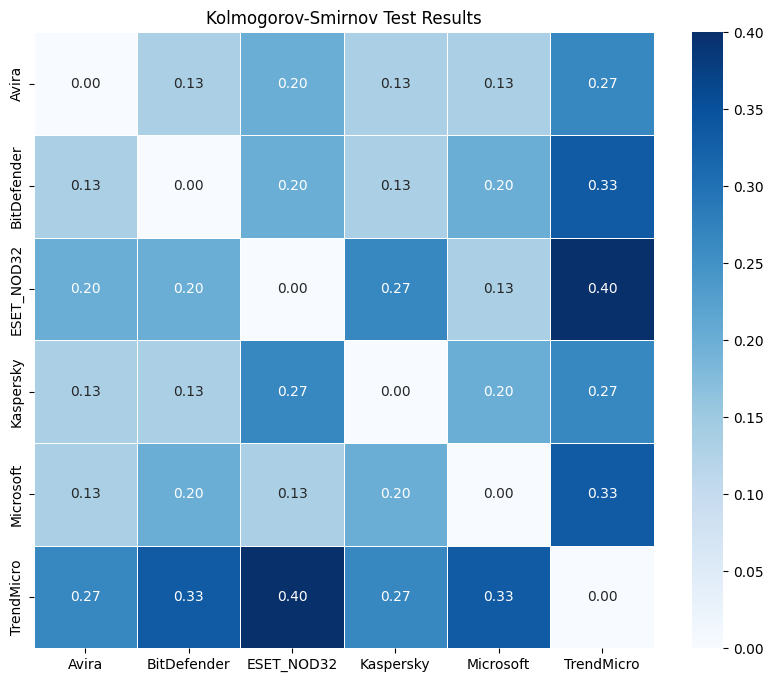

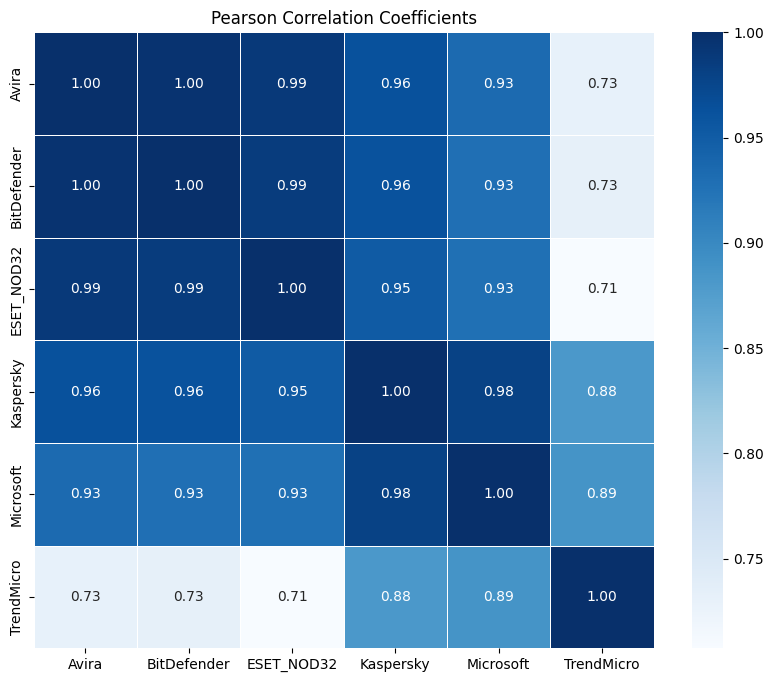

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming ks_results and corr_results DataFrames are already created

# Function to plot heatmap
def plot_heatmap(data, title, cmap="Blues"):
    plt.figure(figsize=(10, 8))
    sns.heatmap(data.astype(float), annot=True, fmt=".2f", cmap=cmap, cbar=True, linewidths=0.5)
    plt.title(title)
    plt.show()

# Plot the Kolmogorov-Smirnov Test Results heatmap
plot_heatmap(ks_results, "Kolmogorov-Smirnov Test Results")

# Plot the Pearson Correlation Coefficients heatmap
plot_heatmap(corr_results, "Pearson Correlation Coefficients")
